
# Reinforcement Learning Example – Q-Learning in Grid World

This notebook demonstrates a basic example of **Reinforcement Learning** using **Q-learning** in a simple grid world.

- **Agent** interacts with an **environment**
- Learns through **trial and error** using **rewards**
- Learns an optimal **policy** for navigating the environment

We’ll simulate a **5x5 grid** where the goal is to reach a reward cell while avoiding penalty cells.

**NOTE: Reinforcement learning does not always succeed. When it fails, reset the environment and try again.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [2]:
# Define grid environment
grid_size = 5
actions = ['up', 'down', 'left', 'right']
action_map = {
    0: (-1, 0),  # up
    1: (1, 0),   # down
    2: (0, -1),  # left
    3: (0, 1)    # right
}

# Rewards
goal = (4, 4)
trap = (2, 3)
reward_map = np.zeros((grid_size, grid_size))
reward_map[goal] = 1
reward_map[trap] = -1

In [3]:
# Initialize Q-table
q_table = np.zeros((grid_size, grid_size, len(actions)))

# Hyperparameters
alpha = 0.1       # learning rate
gamma = 0.9       # discount factor
epsilon = 0.2     # exploration rate
episodes = 700
rewards = []

# Training
for ep in range(episodes):
    state = (0, 0)
    total_reward = 0
    done = False
    while not done:
        if np.random.rand() < epsilon:
            action = np.random.choice(len(actions))  # explore
        else:
            action = np.argmax(q_table[state])

        move = action_map[action]
        next_state = (max(0, min(grid_size - 1, state[0] + move[0])),
                      max(0, min(grid_size - 1, state[1] + move[1])))

        reward = reward_map[next_state]
        best_next = np.max(q_table[next_state])
        q_table[state + (action,)] += alpha * (reward + gamma * best_next - q_table[state + (action,)])

        total_reward += reward
        
        if next_state == goal or next_state == trap:
            done = True

        state = next_state
    rewards.append(total_reward)

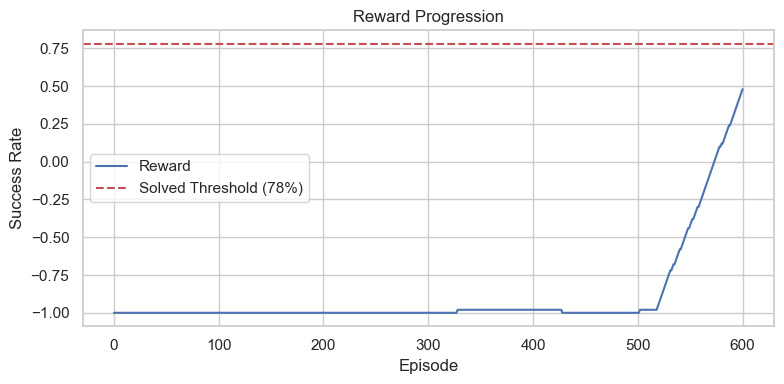

In [4]:
# Plot moving average rewards
def moving_avg(data, window=100):
    return np.convolve(data, np.ones(window)/window, mode='valid')

plt.figure(figsize=(8, 4))
plt.plot(moving_avg(rewards), label='Reward')
plt.axhline(y=0.78, color='r', linestyle='--', label='Solved Threshold (78%)')
plt.title("Reward Progression")
plt.xlabel("Episode")
plt.ylabel("Success Rate")
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
# Create policy map
policy = np.full((grid_size, grid_size), '', dtype=object)
arrow_map = {0: '↑', 1: '↓', 2: '←', 3: '→'}

for i in range(grid_size):
    for j in range(grid_size):
        if (i, j) == goal:
            policy[i, j] = 'Goal'
        elif (i, j) == trap:
            policy[i, j] = 'X'
        else:
            best_action = np.argmax(q_table[i, j])
            policy[i, j] = arrow_map[best_action]

# Display policy
print("Optimal Policy:")
for row in policy:
    print(' '.join(row))
print("")
print("Start: top-left corner")
print("Trap: X")

Optimal Policy:
→ → → → ↓
↑ ↑ ↑ → ↓
↑ ↑ ↑ X ↓
↑ ↑ ↑ ↓ ↓
↑ ↑ ↑ → Goal

Start: top-left corner
Trap: X


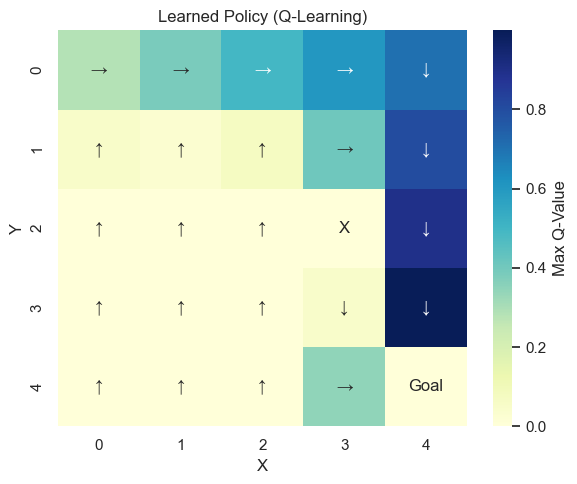

In [6]:
# Heatmap of max Q-values
q_max = np.max(q_table, axis=2)
plt.figure(figsize=(6, 5))
sns.heatmap(q_max, annot=policy, fmt='', cmap="YlGnBu", cbar_kws={'label': 'Max Q-Value'})
plt.title("Learned Policy (Q-Learning)")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()


## What Did We Learn?

- The agent learned the **optimal path** to the goal while avoiding the trap.
- Q-values represent the **expected long-term reward** from each state-action pair.
- The policy uses arrows (↑ ↓ ← →) to show the best action at each cell.


## Key Concepts

| Concept      | Meaning |
|--------------|---------|
| **State**    | Current position of the agent |
| **Action**   | Move taken by the agent |
| **Reward**   | Feedback from environment |
| **Policy**   | Best action to take in each state |
| **Q-Value**  | Expected reward for a state-action |

> Reinforcement learning is useful in robotics, game AI, operations research, and adaptive control systems.
